In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
print(pd.DataFrame({'count':df.isnull().sum(),'percent':df.isnull().sum()/df.shape[0]*100}))

              count  percent
Ship Mode         0      0.0
Segment           0      0.0
Country           0      0.0
City              0      0.0
State             0      0.0
Postal Code       0      0.0
Region            0      0.0
Category          0      0.0
Sub-Category      0      0.0
Sales             0      0.0
Quantity          0      0.0
Discount          0      0.0
Profit            0      0.0


In [6]:
#there are no null values

In [7]:
df.duplicated().sum()

17

In [8]:
#there are 17 duplicated entry in dataframe

In [9]:
df[df.duplicated()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [10]:
#drop duplicated
df.drop_duplicates(inplace=True)
df.shape

(9977, 13)

In [11]:
#as we are analysing saleswe need profit margin to better understand sales in terms of profit
#we will create a calculated fiels
df['Profit_Margin']=df['Profit']/df['Sales']*100

In [12]:
df['Profit_Margin'].head()

0    16.00
1    30.00
2    47.00
3   -40.00
4    11.25
Name: Profit_Margin, dtype: float64

In [13]:
#five point summary numerical
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9977.0,55154.964117,32058.266816,1040.000,23223.0000,55901.000,90008.000,99301.000
Sales,9977.0,230.148902,623.721409,0.444,17.3000,54.816,209.970,22638.480
Quantity,9977.0,3.790719,2.226657,1.000,2.0000,3.000,5.000,14.000
Discount,9977.0,0.156278,0.206455,0.000,0.0000,0.200,0.200,0.800
Profit,9977.0,28.690130,234.457840,-6599.978,1.7262,8.671,29.372,8399.976
Profit_Margin,9977.0,12.011354,46.663769,-275.000,7.5000,27.000,36.250,50.000


In [14]:
#as mean>median for most of the variables the distribution is right skewed
#from profit has negative values shows loss incured by the store


In [15]:
#categorical
df.describe(include=object)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


In [16]:
#4 unique ship mode,most frequent is standard class
#store located in 1 country with 531 branches across cities in 49 states
#3 major category and 17 minor category items are supplied by the store

# Exploratory Data Analysis


1. Which Category is Best Selling and Most Profitable?

In [17]:
category_analysis=pd.DataFrame(df.groupby(by='Category')[['Sales','Profit','Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


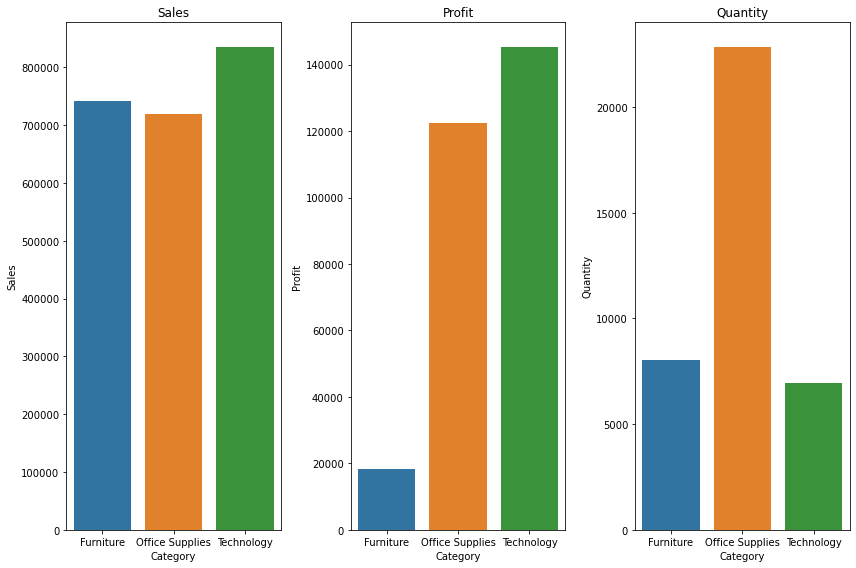

In [18]:
fig,ax=plt.subplots(1,3,figsize=(12,8))
s=sns.barplot(x=category_analysis.index,y=category_analysis['Sales'],ax=ax[0])
p=sns.barplot(x=category_analysis.index,y=category_analysis['Profit'],ax=ax[1])
q=sns.barplot(x=category_analysis.index,y=category_analysis['Quantity'],ax=ax[2])
s.set(title='Sales')
p.set(title='Profit')
q.set(title='Quantity')
plt.tight_layout()
plt.show()

In [19]:
#technology has high profit and high sales

2. What are the Best Selling and Most Profitable Sub-Category?

In [23]:
# Group by sub-category
subcat_analysis = pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [24]:
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


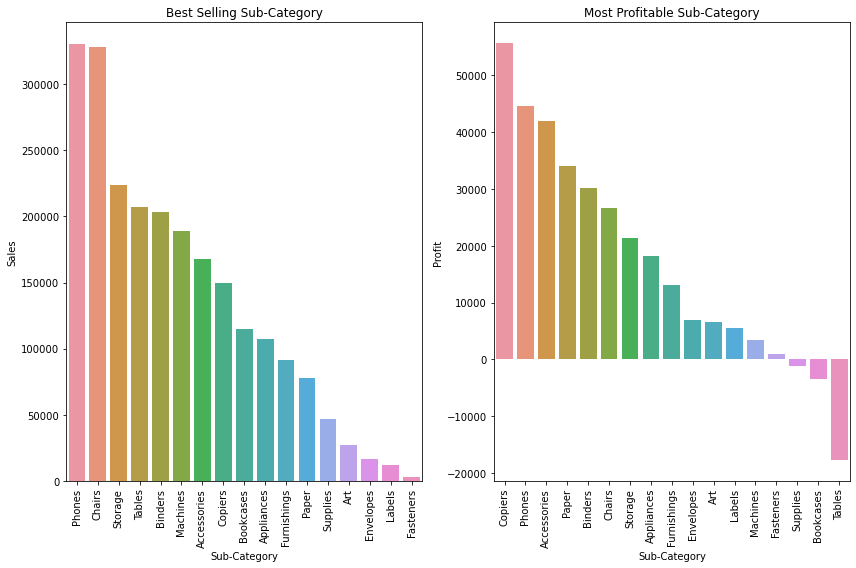

In [26]:
figure,axis=plt.subplots(1,2,figsize=(12,8))
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
# Set spacing between subplots
figure.tight_layout()
plt.show()


In [ ]:
#phones and chairs are top selling sub category
#in terms of profit making it is copiers and phone
#we cn conclude phone is the one which giving more sales and profit 

3. Which is the Top Selling Sub-Category?

In [35]:
subcat_quantity=pd.DataFrame(df.groupby(by='Sub-Category')['Quantity'].sum().sort_values(ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


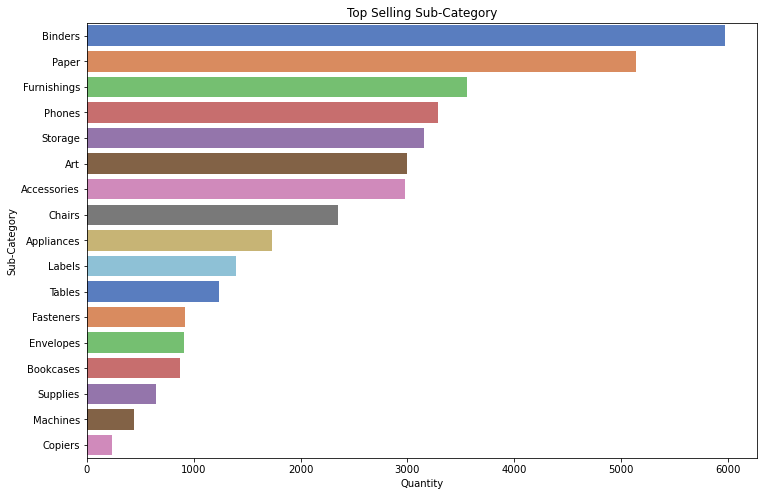

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

In [ ]:
#binders,paper,furnishings,phones are the top selling sub category

4. Which Customer Segment is Most Profitable?

In [38]:
segment_analysis = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


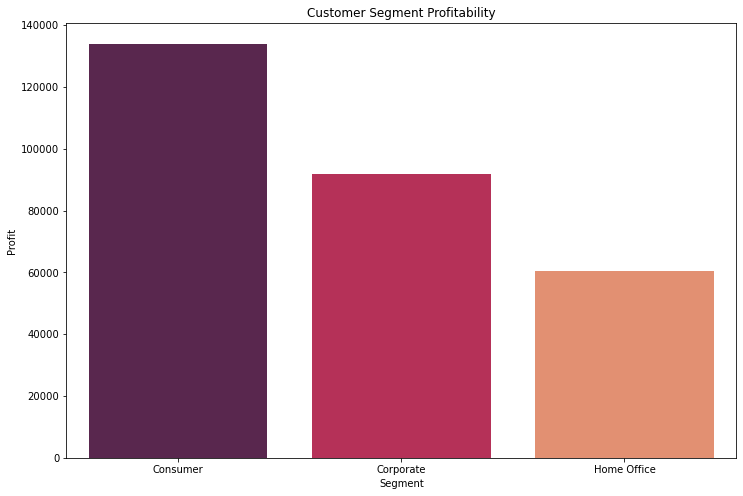

In [40]:
plt.figure(figsize=(12,8))
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()

In [ ]:
#customer segment is more profitable

5. Which is the Preferred Ship Mode?

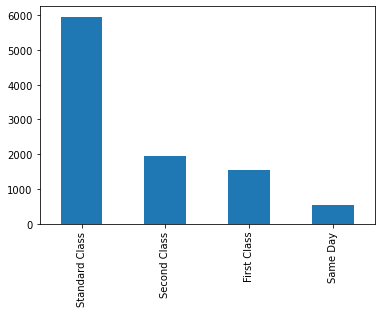

In [41]:
df['Ship Mode'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#standard class is the preferred ship mode

6. Which Region is the Most Profitable?

In [45]:
region_analysis = pd.DataFrame(df.groupby(['Region'])[['Profit']].sum().sort_values(by='Profit',ascending=False))
region_analysis

,Profit
Region,
West,108329.8079
East,91506.3092
South,46749.4303
Central,39655.8752


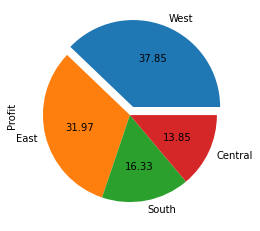

In [53]:
region_analysis.plot(kind='pie',subplots=True,autopct='%.2f',legend=False,explode=[0.1,0,0,0])
plt.show()

In [ ]:
#west region is more profitable

7. Which City has the Highest Number of Sales?

In [54]:
city_analysis = pd.DataFrame(df.groupby(['City'])[['Sales']].sum().sort_values(by='Sales',ascending=False))
city_analysis

,Sales
City,
New York City,256319.041
Los Angeles,175831.901
Seattle,119460.282
San Francisco,112577.172
Philadelphia,109061.461
...,...
Ormond Beach,2.808
Pensacola,2.214
Jupiter,2.064


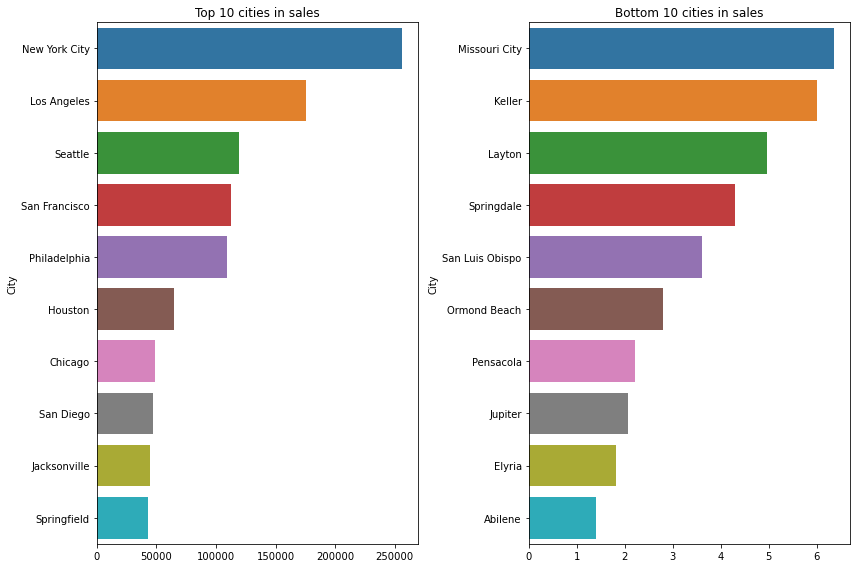

In [67]:
fig,axis=plt.subplots(1,2,figsize=(12,8))
top=sns.barplot(data=city_analysis,y=city_analysis.index[:10],x=city_analysis['Sales'][:10].values,ax=axis[0],orient='h')
bottom=sns.barplot(data=city_analysis,y=city_analysis.index[-10:],x=city_analysis['Sales'][-10:].values,ax=axis[1],orient='h')
top.set(title='Top 10 cities in sales')
bottom.set(title='Bottom 10 cities in sales')
plt.tight_layout()
plt.show()